In [44]:
%load_ext autoreload
%autoreload 2

import os
import sys

diretorio_atual = os.getcwd()
print(f"Logado no diretório: {diretorio_atual}")
sys.path.append('/home/jovyan/work')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Logado no diretório: /home/jovyan/work


In [45]:

import pandas as pd
import utils.Functions as utils 

import matplotlib.pyplot as plt
# Definindo os parâmetros globais
plt.rcParams.update({
    # 'font.family': 'serif',         # Fonte geral
    # 'font.serif': 'Times New Roman',# Estilo da fonte
    'font.size': 12,                # Tamanho da fonte
    'axes.labelsize': 12,           # Tamanho da fonte dos rótulos dos eixos
    'axes.titlesize': 12,           # Tamanho da fonte dos títulos dos subplots
    'xtick.labelsize': 10,          # Tamanho da fonte dos rótulos do eixo x
    'ytick.labelsize': 10,          # Tamanho da fonte dos rótulos do eixo y
    'legend.fontsize': 10,          # Tamanho da fonte da legenda
    'figure.titlesize': 10,         # Tamanho da fonte do título da figura
    # 'axes.spines.right': False,     # Remover a espinha do lado direito
    # 'axes.spines.top': False        # Remover a espinha do topo
    'savefig.dpi': 300,             # DPI para salvar a figura
    'savefig.format': 'png',        # Formato da figura ao salvar
    'savefig.bbox': 'tight',        # Remove espaços em branco extras
    'savefig.pad_inches': 0.1       # Espaçamento de preenchimento em polegadas
})

In [46]:
# Salvando a base de teste em formato CSV
train_data_experimento = pd.read_csv('./data/processed/train_data_experimento.csv')
test_data_experimento  = pd.read_csv('./data/processed/test_data_experimento.csv')

In [47]:
test_data_experimento.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,y_predi_forest_clf,y_proba_forest_clf,y_predi_svm_clf,y_proba_svm_clf
0,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,1,0,0.34,0,0.165110
1,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,0,0,0.03,0,0.137253
2,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,0,0,0.04,0,0.150007


## KS 

### Teste Estatístico de Kolmogorov-Smirnov (KS)

In [55]:
import numpy as np
from scipy.stats import ks_2samp


amostra1 = train_data_experimento['y_proba_forest_clf']
amostra2 = test_data_experimento['y_proba_forest_clf']

# Calcular o teste KS
statistic, p_value = ks_2samp(amostra1, amostra2)

print(f"Estatística KS: {statistic}")
print(f"Valor p: {p_value}")

Estatística KS: 0.1429469825830718
Valor p: 0.0008243147607415938


**Interpretação:**

- **`Estatística KS:`** Este valor quantifica a diferença máxima entre as distribuições cumulativas das duas amostras. `Quanto maior esse valor, maior a diferença entre as distribuições.`

- **`Valor p:`** Este valor indica a significância estatística do resultado. `Um valor p pequeno` (geralmente menor que 0.05) indica que há evidências significativas para `rejeitar a hipótese nula de que as duas amostras vêm da mesma distribuição`.

## Métrica de Performance Kolmogorov-Smirnov (KS)

In [ ]:
# Calculando a tabela KS e o valor KS
kstable, metric_ks = utils.calculate_ks(df = test_data_experimento, target_col = 'Survived', prob_col = 'y_proba_forest_clf')
kstable

KS: 56.43, Decile 7
----


,Range,events,nonevents,Total,event_rate %,nonevent_rate %,cum_event_rate %,cum_nonevent_rate %,KS
Decile,,,,,,,,,
1,[0-0.1],8,75,83,7.21%,47.77%,7.21%,47.77%,40.56
2,(0.1-0.2],6,29,35,5.41%,18.47%,12.61%,66.24%,53.63
3,(0.2-0.3],9,9,18,8.11%,5.73%,20.72%,71.97%,51.25
4,(0.3-0.4],6,9,15,5.41%,5.73%,26.13%,77.71%,51.58
5,(0.4-0.5],5,12,17,4.50%,7.64%,30.63%,85.35%,54.72
6,(0.5-0.6],4,8,12,3.60%,5.10%,34.23%,90.45%,56.21
7,(0.6-0.7],4,6,10,3.60%,3.82%,37.84%,94.27%,56.43
8,(0.7-0.8],4,1,5,3.60%,0.64%,41.44%,94.90%,53.46
9,(0.8-0.9],12,3,15,10.81%,1.91%,52.25%,96.82%,44.56


KS: 56.43, Decile 7
----


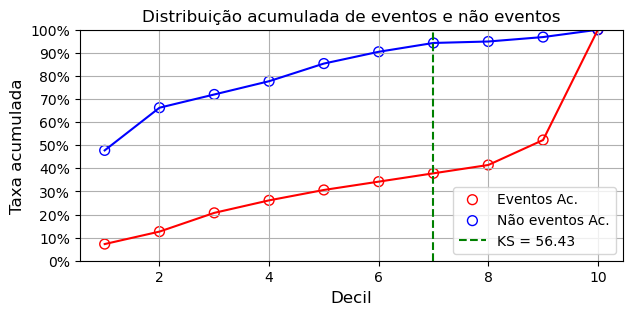

In [49]:
# Exemplo de uso
utils.plot_ks(test_data_experimento, 'Survived', 'y_proba_forest_clf')

## Distribuições

### Distribuições Coluna

In [50]:
table = utils.column_event_distribution(df = test_data_experimento,  target_col = 'Survived', prob_col = 'y_proba_forest_clf')
table

,Range,events,nonevents,event_rate %,nonevent_rate %
1,[0-0.1],8,75,7.21,47.77
2,(0.1-0.2],6,29,5.41,18.47
3,(0.2-0.3],9,9,8.11,5.73
4,(0.3-0.4],6,9,5.41,5.73
5,(0.4-0.5],5,12,4.50,7.64
6,(0.5-0.6],4,8,3.60,5.10
7,(0.6-0.7],4,6,3.60,3.82
8,(0.7-0.8],4,1,3.60,0.64
9,(0.8-0.9],12,3,10.81,1.91
10,(0.9-1.0],53,5,47.75,3.18


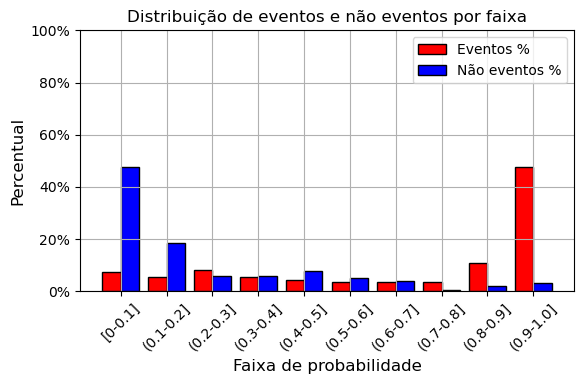

In [51]:
utils.plot_event_distribution(df = test_data_experimento,  target_col = 'Survived', prob_col = 'y_proba_forest_clf')

### Distribuições Linha

In [ ]:
table_line = utils.line_event_distribution(df = test_data_experimento,  target_col = 'Survived', prob_col = 'y_proba_forest_clf')
table_line

,Range,events,nonevents,total_line,event_rate_line %,nonevents_rate_line %,eventos/nonevents
1,[0-0.1],8,75,83,9.64,90.36,10.67
2,(0.1-0.2],6,29,35,17.14,82.86,20.69
3,(0.2-0.3],9,9,18,50.00,50.00,100.00
4,(0.3-0.4],6,9,15,40.00,60.00,66.67
5,(0.4-0.5],5,12,17,29.41,70.59,41.67
6,(0.5-0.6],4,8,12,33.33,66.67,50.00
7,(0.6-0.7],4,6,10,40.00,60.00,66.67
8,(0.7-0.8],4,1,5,80.00,20.00,400.00
9,(0.8-0.9],12,3,15,80.00,20.00,400.00
10,(0.9-1.0],53,5,58,91.38,8.62,1060.00


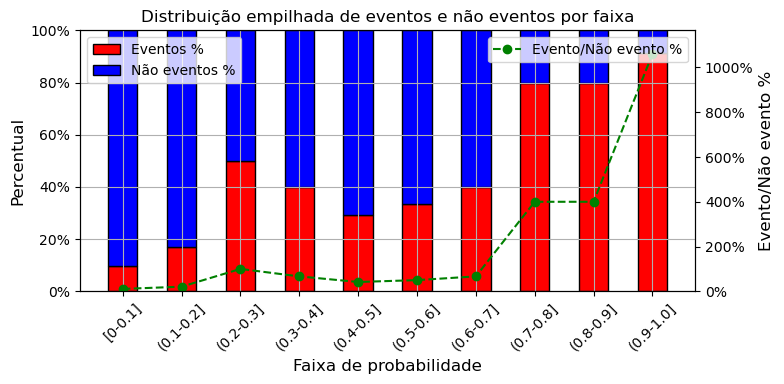

In [54]:
# Exemplo de uso
utils.plot_stacked_bar(df=test_data_experimento, target_col='Survived', prob_col='y_proba_forest_clf')

## PSI

### CSI